In [4]:
import nltk, re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

What I want to achieve with the messages is :
1. Detect topics from messages send from the top 3 country in the dataset
2.  Use MultinomialNB to identify from which country a message has been sent to
3. Detect emotions of the messages using LTSM  

In [21]:
df = pd.read_csv('new_clean_nus_sms.csv')
df.head()

,id,Message,length,country,Date,year,month
0,10120,Bugis oso near wat...,21,Singapore,2003/4,2003,4
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,2003,4
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,2003,4
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,2003,4
4,10124,Meet after lunch la...,22,Singapore,2003/4,2003,4


In [22]:
len(df["country"].value_counts())

32

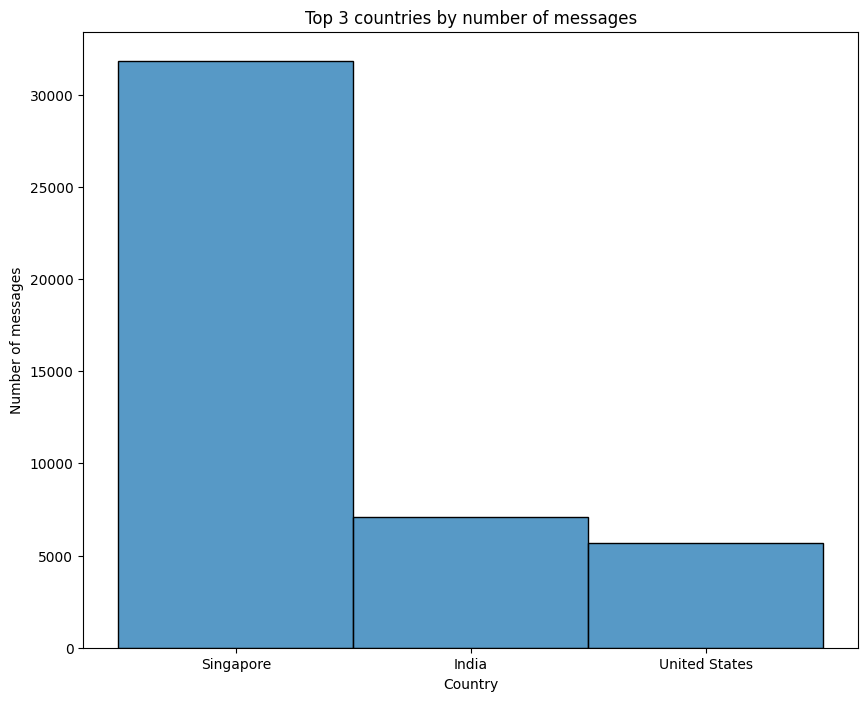

In [23]:
#to detect 3 top countries, I need to identify them by building a graph 
top_3_countries = df["country"].value_counts().nlargest(3).index
filtered_df = df[df["country"].isin(top_3_countries)]
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data = filtered_df, x = "country", ax =ax)
ax.set_title("Top 3 countries by number of messages")
ax.set_xlabel("Country")
ax.set_ylabel("Number of messages")
plt.show()

In [24]:
from nltk.stem.wordnet import WordNetLemmatizer
import string

1. It is time to remove punctuation, stop words, httml links and tags, and non english symbols
2. Tokenize of course 


In [25]:
df["Message_clean"] = df["Message"].str.lower()
df.head()

,id,Message,length,country,Date,year,month,Message_clean
0,10120,Bugis oso near wat...,21,Singapore,2003/4,2003,4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,2003,4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,2003,4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,2003,4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,Singapore,2003/4,2003,4,meet after lunch la...


In [26]:
df["Message_clean"] = df["Message_clean"].str.replace('[^\w\s]','')
df.head()

,id,Message,length,country,Date,year,month,Message_clean
0,10120,Bugis oso near wat...,21,Singapore,2003/4,2003,4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,2003,4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,2003,4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,2003,4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,Singapore,2003/4,2003,4,meet after lunch la...


In [27]:
import re

In [28]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


In [29]:
# Remove URLs from Message data

df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_urls(text))
df.head()

,id,Message,length,country,Date,year,month,Message_clean
0,10120,Bugis oso near wat...,21,Singapore,2003/4,2003,4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,2003,4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,2003,4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,2003,4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,Singapore,2003/4,2003,4,meet after lunch la...


In [30]:
# Create a function to remove HTML Tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_html(text))
df.head()

,id,Message,length,country,Date,year,month,Message_clean
0,10120,Bugis oso near wat...,21,Singapore,2003/4,2003,4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,2003,4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,2003,4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,2003,4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,Singapore,2003/4,2003,4,meet after lunch la...


In [ ]:
def remove_sign(text):
    return re.sub(r"┾",' ',text)

df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_sign(text))
df.head()

,id,Message,length,country,Date,year,month,Message_clean
0,10120,Bugis oso near wat...,21,Singapore,2003/4,2003,4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,2003,4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,2003,4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,2003,4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,Singapore,2003/4,2003,4,meet after lunch la...


In [34]:
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7Fü]+',' ', text)

df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_non_ascii(text))
df[:20]

,id,Message,length,country,Date,year,month,Message_clean
0,10120,Bugis oso near wat...,21,Singapore,2003/4,2003,4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,2003,4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,2003,4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,2003,4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,Singapore,2003/4,2003,4,meet after lunch la...
5,10125,m walking in citylink now ü faster come down.....,65,Singapore,2003/4,2003,4,m walking in citylink now ü faster come down.....
6,10126,5 nights...We nt staying at port step liao...T...,51,Singapore,2003/4,2003,4,5 nights...we nt staying at port step liao...t...
7,10127,Hey pple...$700 or $900 for 5 nights...Excelle...,81,Singapore,2003/4,2003,4,hey pple...$700 or $900 for 5 nights...excelle...
8,10128,Yun ah.the ubi one say if ü wan call by tomorr...,160,Singapore,2003/4,2003,4,yun ah.the ubi one say if ü wan call by tomorr...
9,10129,Hey tmr maybe can meet you at yck,33,Singapore,2003/4,2003,4,hey tmr maybe can meet you at yck


In [35]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')
# Tokenize cleaned messages
df['Message_tokenized'] = df.apply(lambda x: nltk.word_tokenize(x['Message_clean']), axis=1)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\exol1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,Message,length,country,Date,year,month,Message_clean,Message_tokenized
0,10120,Bugis oso near wat...,21,Singapore,2003/4,2003,4,bugis oso near wat...,"[bugis, oso, near, wat, ...]"
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,2003,4,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,2003,4,i dunno until when... lets go learn pilates...,"[i, dunno, until, when, ..., lets, go, learn, ..."
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,2003,4,den only weekdays got special price... haiz......,"[den, only, weekdays, got, special, price, ......"
4,10124,Meet after lunch la...,22,Singapore,2003/4,2003,4,meet after lunch la...,"[meet, after, lunch, la, ...]"


In [39]:
lemmatizer = WordNetLemmatizer()
from collections import Counter
from nltk.corpus import wordnet

In [40]:
def get_part_of_speech(word):
  probable_part_of_speech = wordnet.synsets(word)
  pos_counts = Counter()
  pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
  pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
  pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
  pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
  most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
  return most_likely_part_of_speech


In [41]:
df["Message_lemmatized"] = [list() for i in range(len(df["Message_tokenized"]))]
# Loop over each row, gather up the tokenized text, go through the tokenized text word by word to lemmatize it (after
# determining which part of speech the word most probably belongs to), and add the lemmatized word to the list in
# Msg_token_nostop_lemmed for that particular row:
for i in range(len(df['Message_tokenized'])):
    # Pluck off the list of tokens corresponding to this particular row:
    the_text = df.Message_tokenized.iloc[i]
    # Loop over tokens in the current list of tokens: 
    for word in the_text:
        # Lemmatize the token after first determining its likely part of speech:
        lemmatized = lemmatizer.lemmatize(word, get_part_of_speech(word))
        # Add the lemmatized token to the list of tokens:
        df.Message_lemmatized.iloc[i].append(lemmatized)

df.Message_lemmatized.head()

0                         [bugis, oso, near, wat, ...]
1    [go, until, jurong, point, ,, crazy, .., avail...
2    [i, dunno, until, when, ..., let, go, learn, p...
3    [den, only, weekday, get, special, price, ...,...
4                        [meet, after, lunch, la, ...]
Name: Message_lemmatized, dtype: object

In [43]:
df.to_csv('processed_cleaned_sms.csv', index=False)